**In-Vehicle Coupon Recommendation Machine Learning Project**

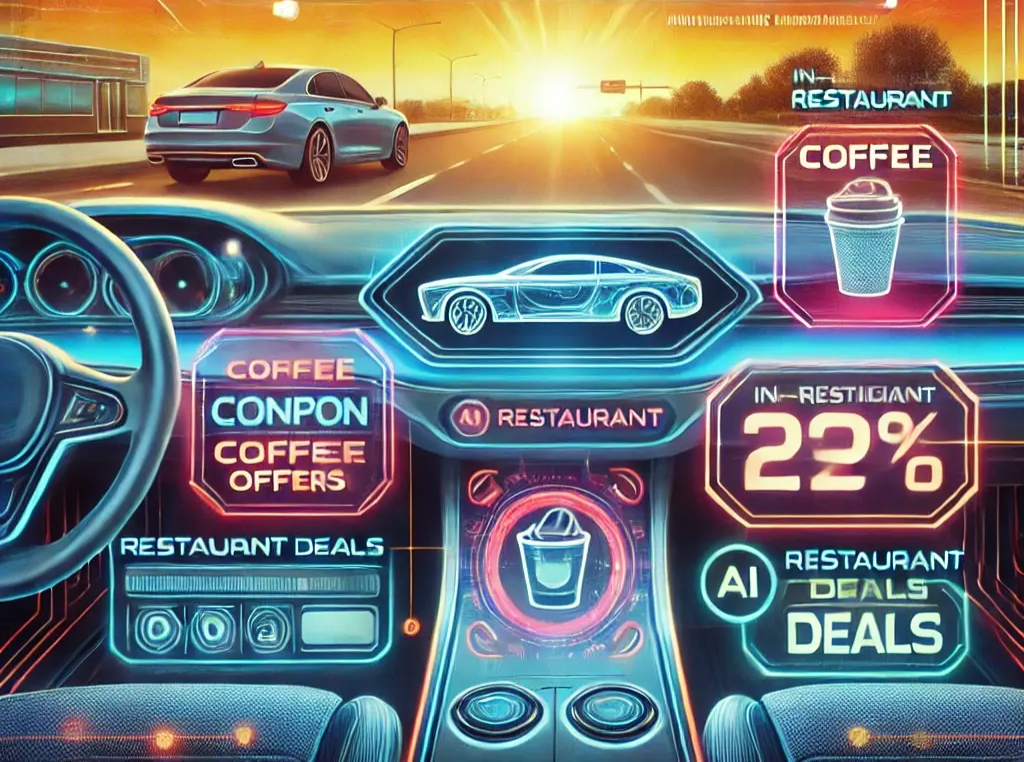

In [22]:

image_path = "VEHICLE.png"  
display(Image(filename=image_path, width=600, height=50))

Name: ABHINAND K VARGHESE

Organization: Entri Elevate


# Introduction

This project aims to build a machine learning model to predict whether a person will accept a coupon recommended to them in various driving scenarios. The dataset contains 12,684 instances with 25 features, capturing demographic, contextual, and behavioral information.

**Objectives:**
Perform exploratory data analysis (EDA) to understand the dataset and uncover patterns.
Preprocess the data by handling missing values and encoding categorical variables.
Train and evaluate classification models to predict coupon acceptance.


**Dataset Overview:**
Source: Collected via a survey on Amazon Mechanical Turk.
Target Variable: coupon_response (binary: 1 for coupon accepted, 0 for not accepted).
Features: 25 features including demographic attributes (e.g., age, gender), driving context (e.g., destination, time, weather), and behavioral patterns (e.g., frequency of visiting restaurants).

Missing Values: Some features contain missing values that will require imputation.
The insights and predictions from this project could inform targeted marketing strategies and optimize coupon recommendations for specific driving scenarios.

**Dataset Description:**

The dataset contains information about individuals, their demographic attributes, driving conditions, and preferences, aiming to predict their likelihood of accepting various coupons under different scenarios. 

Below is a detailed explanation of each column:

destination: The type of destination the individual is traveling to (e.g., "No Urgent Place," "Home," "Work").

passanger: The type of passenger(s) accompanying the individual (e.g., "Alone," "Friend(s)," "Kid(s)").

weather: The weather condition during the trip (e.g., "Sunny," "Rainy," "Snowy").

temperature: The temperature (in Fahrenheit) during the trip.

time: The time of day when the individual is traveling (e.g., "10AM," "2PM").

coupon: The type of coupon offered to the individual (e.g., "Coffee House," "Carry out & Take away," "Restaurant(<20)").

expiration: The duration for which the coupon remains valid (e.g., "1d" for 1 day, "2h" for 2 hours).

gender: The gender of the individual (e.g., "Male," "Female").
age: The age of the individual.

maritalStatus: The marital status of the individual (e.g., "Single," "Married," "Unmarried partner").

has_children: Indicates whether the individual has children (1 for "Yes," 0 for "No").

education: The highest level of education attained by the individual (e.g., "Some college - no degree," "Graduate degree (Masters or Doctorate)").

occupation: The type of job or employment status of the individual (e.g., "Unemployed," "Executive/Managerial").

income: The income range of the individual (e.g., "$37500 - $49999," "$62500 - $74999").

car: The ownership status of a car, typically indicating the type of car owned (this column may contain missing or blank values).

Bar: The average frequency with which the individual visits a bar (e.g., "never," "less1," "1~3").

CoffeeHouse: The average frequency with which the individual visits a coffee house.

CarryAway: The average frequency with which the individual uses carryout or takeaway food services.

RestaurantLessThan20: The average frequency with which the individual visits restaurants costing less than $20.

Restaurant20To50: The average frequency with which the individual visits restaurants costing between $20 and $50.

toCoupon_GEQ5min: Indicates whether the destination is at least 5 minutes away from the individual’s location (1 for "Yes," 0 for "No").

toCoupon_GEQ15min: Indicates whether the destination is at least 15 minutes away from the individual’s location.

toCoupon_GEQ25min: Indicates whether the destination is at least 25 minutes away from the individual’s location.

direction_same: Indicates whether the coupon's destination is in the same direction as the individual’s current route (1 for "Yes," 0 for "No").

direction_opp: Indicates whether the coupon's destination is in the opposite direction to the individual’s current route (1 for "Yes," 0 for "No").

coupon_response: The target column, indicating whether the individual accepted the coupon (1 for "Accepted," 0 for "Not Accepted").


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [28]:
from sklearn.preprocessing import LabelEncoder
import math
from scipy.stats import zscore
from scipy import stats
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [32]:
import warnings
warnings.filterwarnings('ignore')

#Load the Dataset

In [34]:
data = pd.read_excel('vehicleCoupon.xlsx')

In [36]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_response
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [38]:
df = data.copy()

In [40]:
df.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_response
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


#Data Preprocessing 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [44]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_response
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
coupon_response             0
dtype: int64

In [48]:
# Check the number of unique values in each column
data.nunique()


destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
coupon_response          2
dtype: int64

In [50]:
# Loop through each column and print unique values
for col in data.columns:
    print(f"Column: {col}")
    print(data[col].unique())
    print("-" * 50)  # Separator for better readability


Column: destination
['No Urgent Place' 'Home' 'Work']
--------------------------------------------------
Column: passanger
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
--------------------------------------------------
Column: weather
['Sunny' 'Rainy' 'Snowy']
--------------------------------------------------
Column: temperature
[55 80 30]
--------------------------------------------------
Column: time
['2PM' '10AM' '6PM' '7AM' '10PM']
--------------------------------------------------
Column: coupon
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
--------------------------------------------------
Column: expiration
['1d' '2h']
--------------------------------------------------
Column: gender
['Female' 'Male']
--------------------------------------------------
Column: age
[21 46 26 31 41 '50plus' 36 'below21']
--------------------------------------------------
Column: maritalStatus
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']


In [20]:
#Dropping car column

In [52]:
df = df.drop(columns=['car'])

Why Dropping Makes Sense:

The car column has almost all its values missing (12,576 out of 12,684 entries), which means it’s unlikely to provide meaningful information for analysis.

A column with 99% missing values won't provide enough signal for the model to learn meaningful patterns.
Retaining it might unnecessarily increase computational cost and add noise to model.

#Dropping rows with missing values in specific columns

In [54]:

df = df.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])

Explanation for Dropping Rows

Low Impact on Data Size:
With over 12,000 rows in the dataset, removing a small percentage (~1-2%) ensures the dataset remains robust for training without significantly affecting the results.

Avoiding Imputation Bias:
Imputing missing values could introduce bias, especially if the imputed values don’t accurately reflect the true distribution. Dropping rows avoids this risk.

Clean and Complete Data:
Most machine learning models perform better with clean, non-missing data. Dropping these rows ensures the features are fully populated.

Minimal Information Loss:
Since the proportion of dropped rows is very small, the impact on the overall dataset is negligible.


In [56]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
coupon_response         0
dtype: int64

In [58]:
#checking duplicate values
df.duplicated().sum()

72

In [60]:
df = df.drop_duplicates()

In [62]:
df.duplicated().sum()

0

Explanation for Action
Removing duplicates ensures that each row in the dataset represents a unique observation.
Since only 72 duplicates exist in a dataset of over 12,000 rows, the loss of data is minimal and won't affect the overall model performance.

In [64]:
df.shape

(12007, 25)

#Check the ratio of values in the target column (coupon_response)

In [66]:
target_ratio = df['coupon_response'].value_counts(normalize=True)
target_ratio

coupon_response
1    0.568418
0    0.431582
Name: proportion, dtype: float64

The target column coupon_response shows the following proportions:

1 (Accepted): 56.84%
0 (Not Accepted): 43.16%
This indicates a fairly balanced dataset with a slight majority of instances where coupons were accepted. Since neither class dominates excessively, standard classification models should handle this data well without requiring significant adjustments for class imbalance.

In [68]:
df.replace(['NaN', 'nan', 'NULL', ''], pd.NA, inplace=True)


In [70]:
df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_response
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
29,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
31,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1


#Exploratory Data Analysis (EDA)

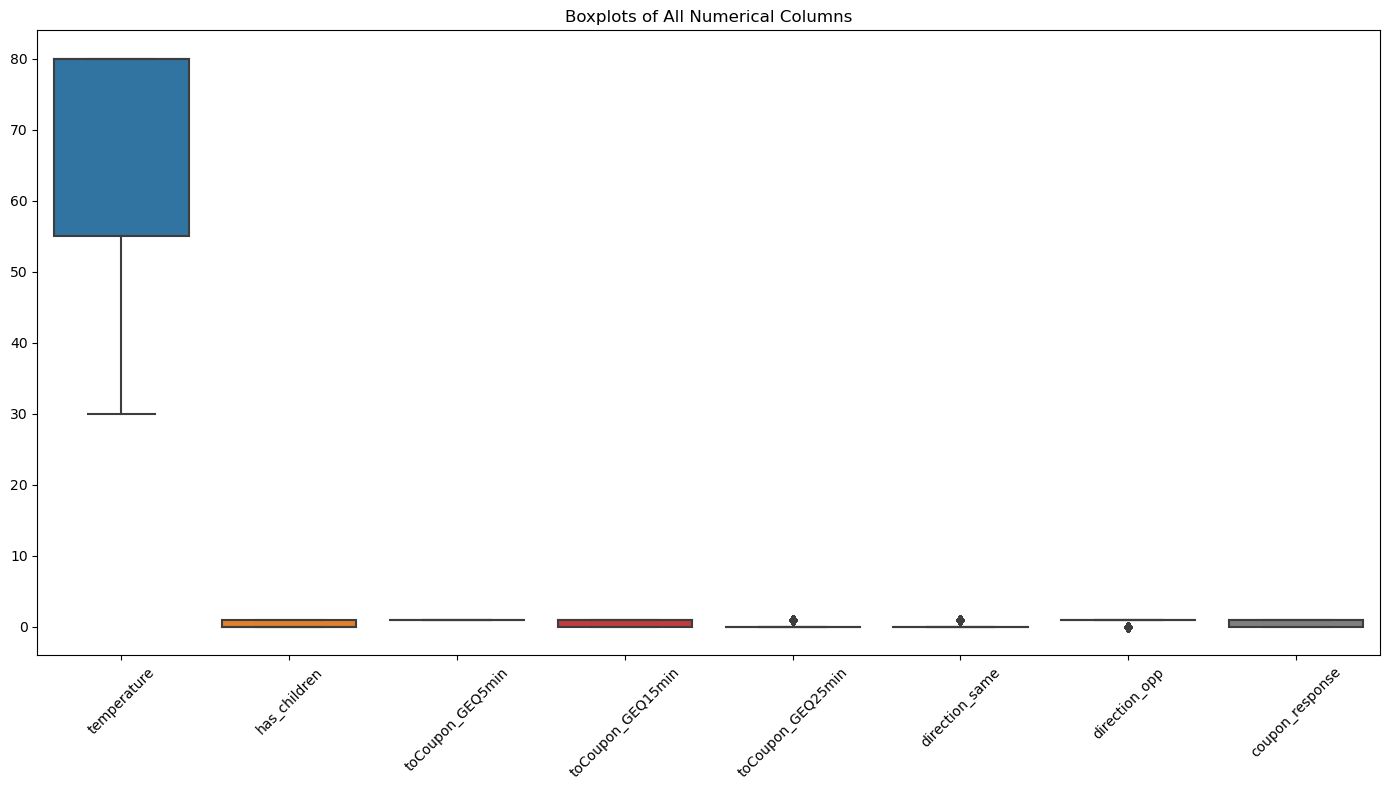

In [72]:


# Select numerical columns for plotting
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a boxplot for all numerical columns in one chart
plt.figure(figsize=(14, 8))  # Adjust the figure size if needed

# Plot the boxplot
sns.boxplot(data=df[numerical_cols])

# Set the title and rotate labels for better visibility
plt.title('Boxplots of All Numerical Columns')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [39]:
#Histograms with Bell Curve (KDE) for All Numerical Columns:

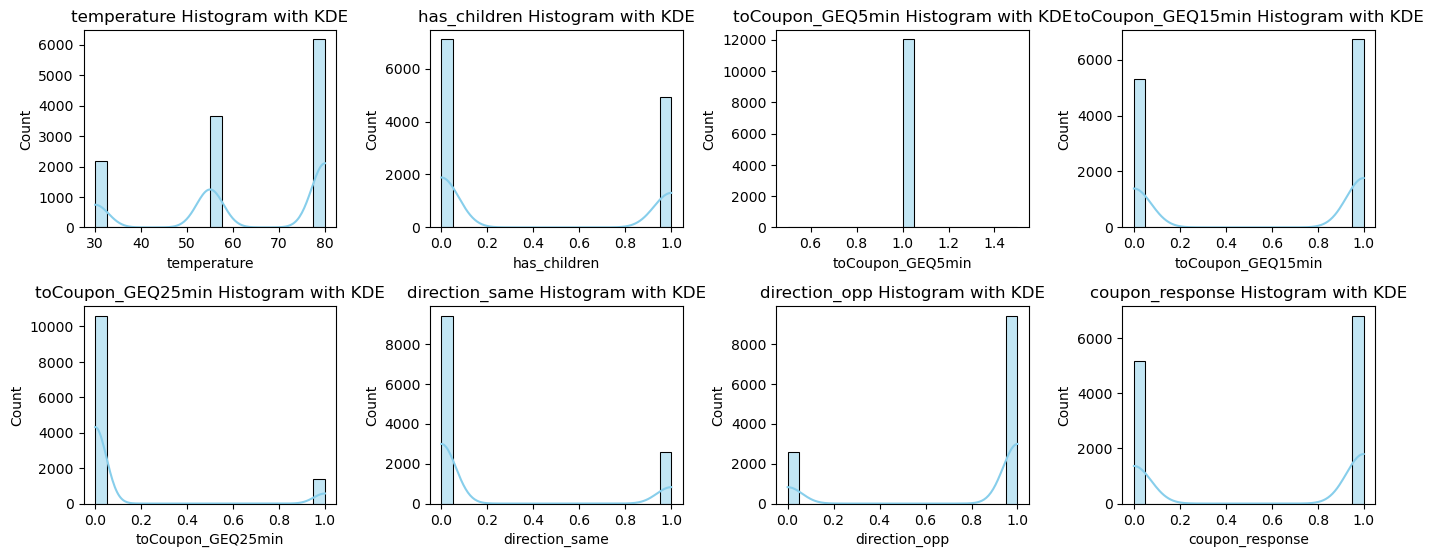

In [74]:
# Select numerical columns for plotting
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the plot size
plt.figure(figsize=(14, 8))

# Loop through each numerical column and plot its histogram with KDE
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # Creates a grid of subplots (adjust rows and columns as needed)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue', edgecolor='black')  # Histogram with KDE
    plt.title(f'{col} Histogram with KDE')
    
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [76]:
print(df.columns)


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'coupon_response'],
      dtype='object')


In [78]:
df.columns = df.columns.str.strip()

In [80]:
# Remove any extra spaces, hidden characters, or special characters
df.columns = df.columns.str.replace(r'\s+', '', regex=True)


In [82]:
# Remove single quotes around column names
df.columns = df.columns.str.replace("'", "")


In [45]:
#Distribution of Coupon Types

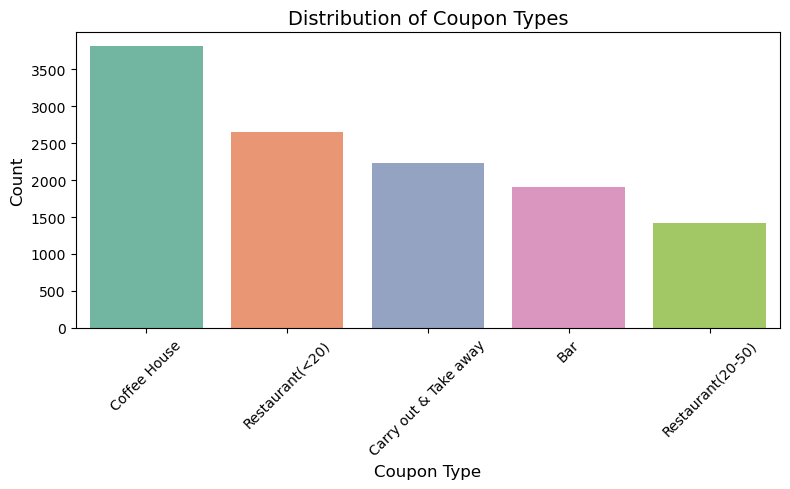

In [84]:
# Plot a bar chart for the 'coupon' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='coupon', palette='Set2', order=df['coupon'].value_counts().index)

plt.title('Distribution of Coupon Types', fontsize=14)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
#Bar chart of the passanger column to see how coupon responses vary by passenger type:

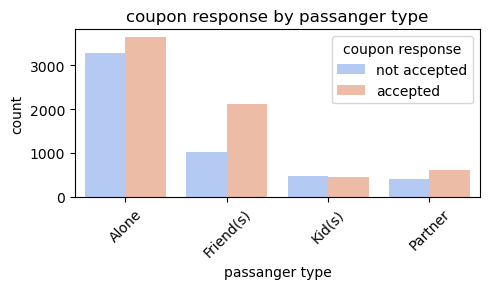

In [86]:
# Bar chart for 'passanger' vs 'coupon_response'
plt.figure(figsize=(5,3))
sns.countplot(data=df, x ='passanger', hue='coupon_response', palette = 'coolwarm')
plt.title('coupon response by passanger type',fontsize=12)
plt.xlabel('passanger type',fontsize=10)
plt.ylabel('count',fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='coupon response',loc='upper right', labels=['not accepted','accepted'])
plt.tight_layout()
plt.show()


In [49]:
#Bar chart for gender column to see how coupon response vary by gender type

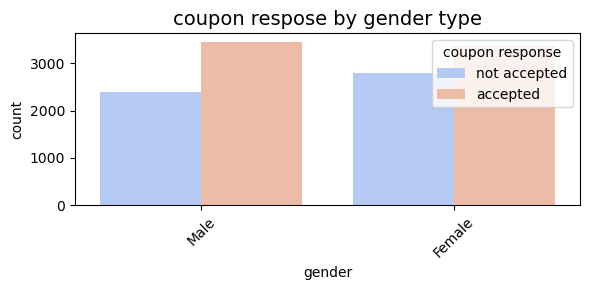

In [88]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x = 'gender' , hue='coupon_response',palette='coolwarm')
plt.title('coupon respose by gender type',fontsize=14)
plt.legend(title='coupon response',loc='upper right', labels=['not accepted','accepted'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

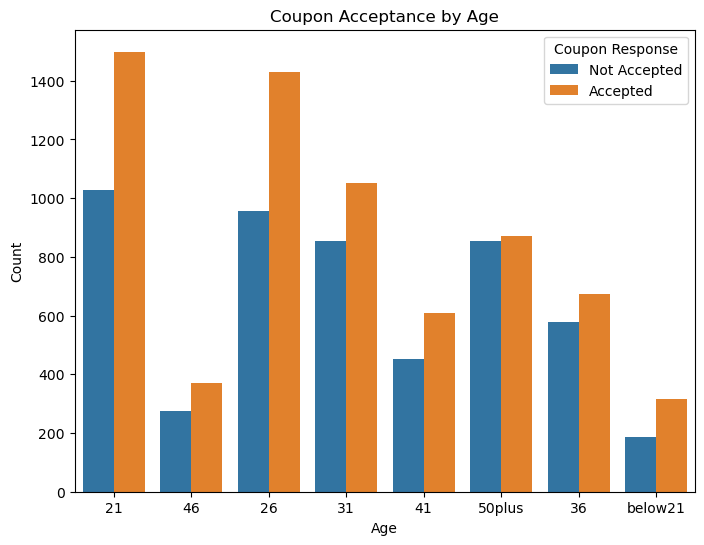

In [90]:
# Plot coupon acceptance distribution by age group without modifying the DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age', hue='coupon_response')
plt.title('Coupon Acceptance by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Coupon Response', labels=['Not Accepted', 'Accepted'])
plt.show()


In [52]:
#Coupon Response by Time of Day
#Insight Goal: Does the time of day affect the likelihood of accepting coupons?

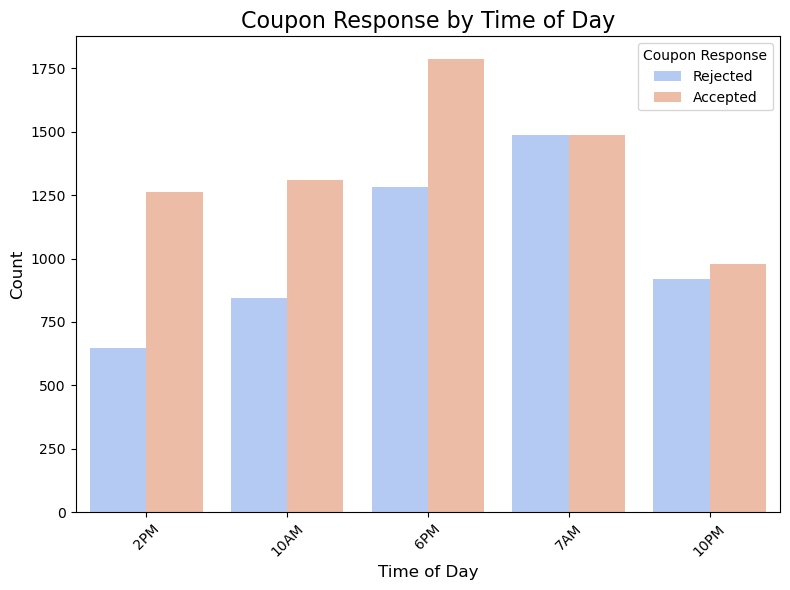

In [92]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='time', hue='coupon_response', palette='coolwarm')
plt.title('Coupon Response by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Coupon Response', labels=['Rejected', 'Accepted'], fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6 PM sees the highest coupon acceptance, possibly due to people being more relaxed and open after work hours.
7 AM has the highest rejection rate.
2 PM has the lowest rejection rate, showing openness to coupons in the early afternoon.
10 PM has the lowest acceptance, likely due to limited relevance of offers at that time.


In [55]:
#Coupon Response by Weather
#Insight Goal: Do weather conditions affect acceptance rates?

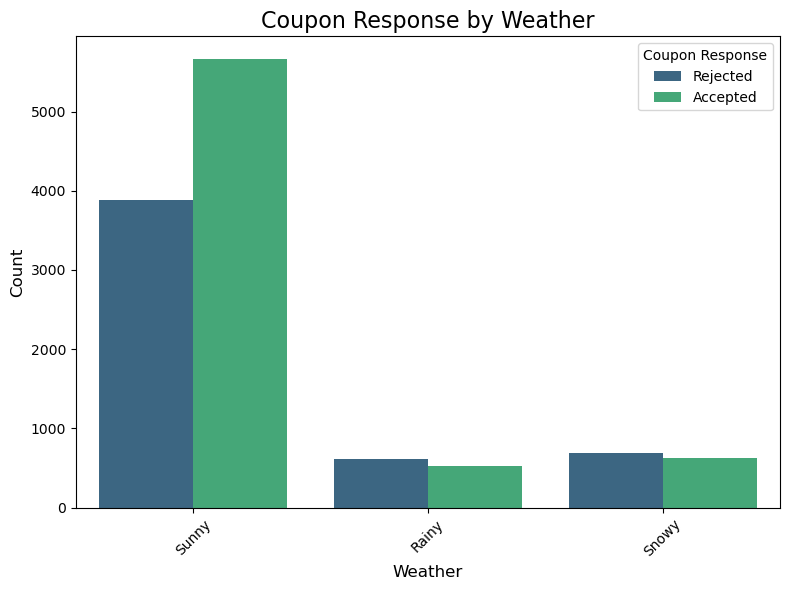

In [94]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='weather', hue='coupon_response', palette='viridis')
plt.title('Coupon Response by Weather', fontsize=16)
plt.xlabel('Weather', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Coupon Response', labels=['Rejected', 'Accepted'], fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [57]:
#Acceptance Rates by Income Levels
#Insight Goal: Are individuals with certain income levels more likely to accept coupons?

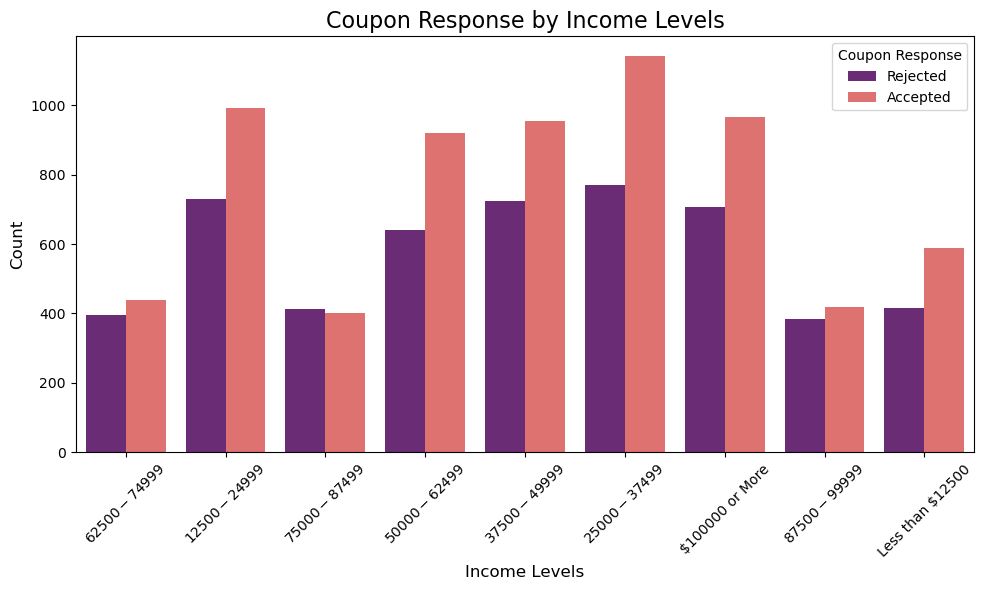

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='income', hue='coupon_response', palette='magma')
plt.title('Coupon Response by Income Levels', fontsize=16)
plt.xlabel('Income Levels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Coupon Response', labels=['Rejected', 'Accepted'], fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [59]:
#Coupon Acceptance for Each Coupon Type
#Insight Goal: Which types of coupons are most likely to be accepted


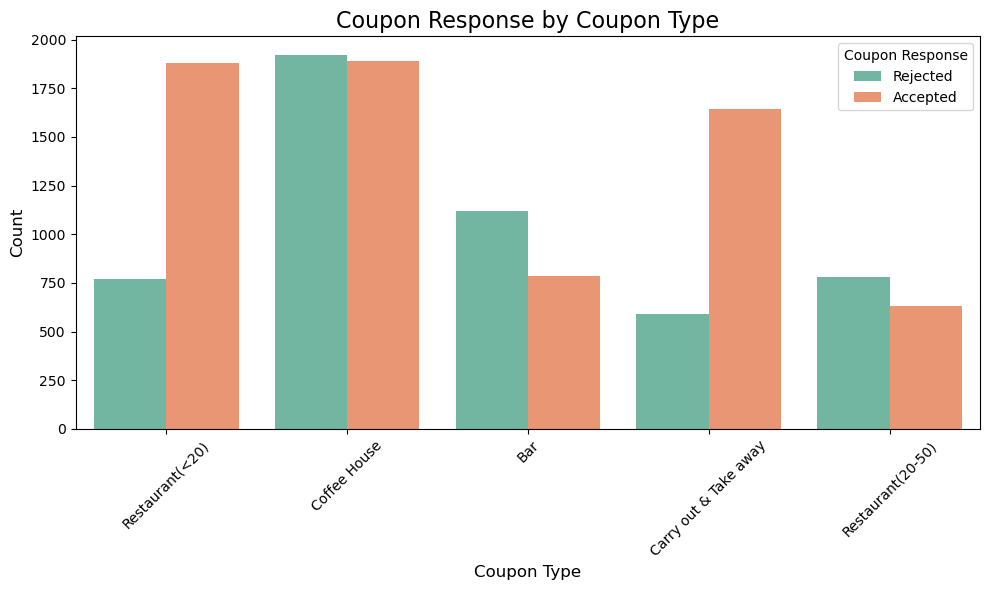

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='coupon', hue='coupon_response', palette='Set2')
plt.title('Coupon Response by Coupon Type', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Coupon Response', labels=['Rejected', 'Accepted'], fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Occupation Distribution (Bar Plot)
This will help us understand how the occupation column is distributed and if any categories are overly rare.

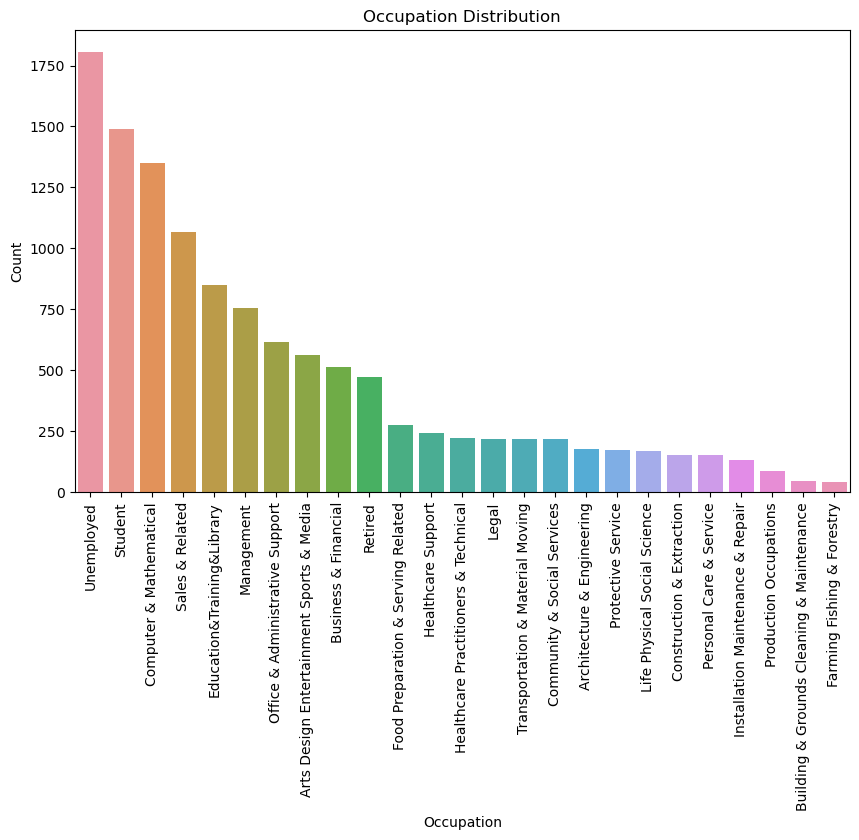

In [100]:
# Plotting the distribution of the occupation column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='occupation', order=df['occupation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

Occupation vs Coupon Acceptance (Bar Plot)
This chart will give us insights into how different occupations relate to coupon acceptance. We'll check how the occupation category relates to the target column coupon_response.

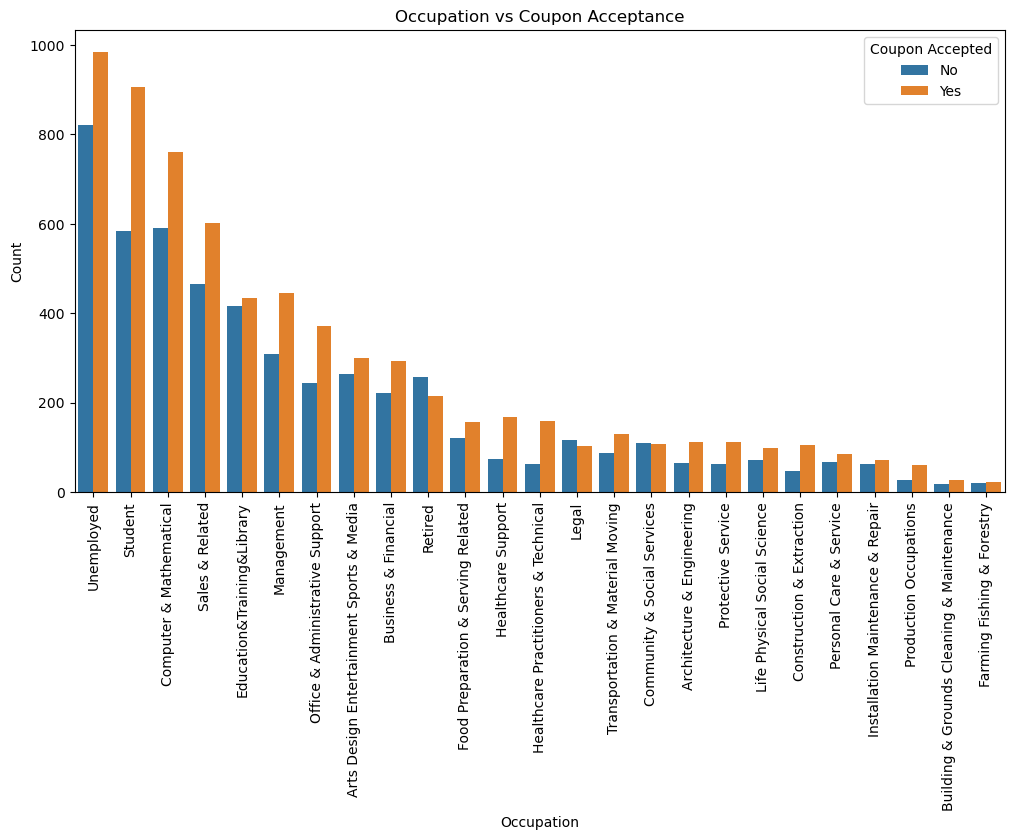

In [102]:
# Plotting the occupation vs coupon acceptance
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='occupation', hue='coupon_response', order=df['occupation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Occupation vs Coupon Acceptance')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', loc='upper right', labels=['No', 'Yes'])
plt.show()


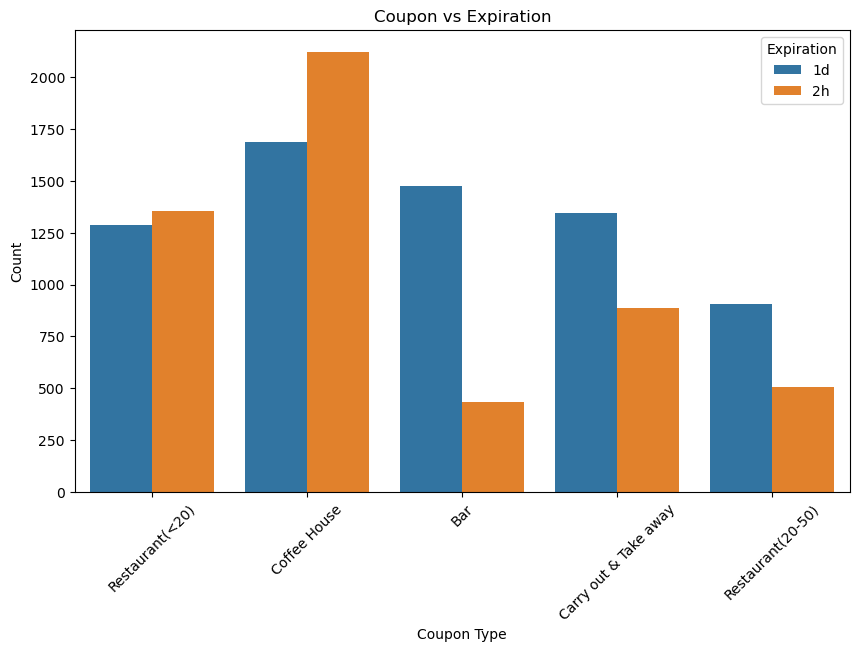

In [104]:
# Count plot of coupon vs expiration
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', hue='expiration', data=df)
plt.title('Coupon vs Expiration')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.legend(title='Expiration', loc='upper right')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

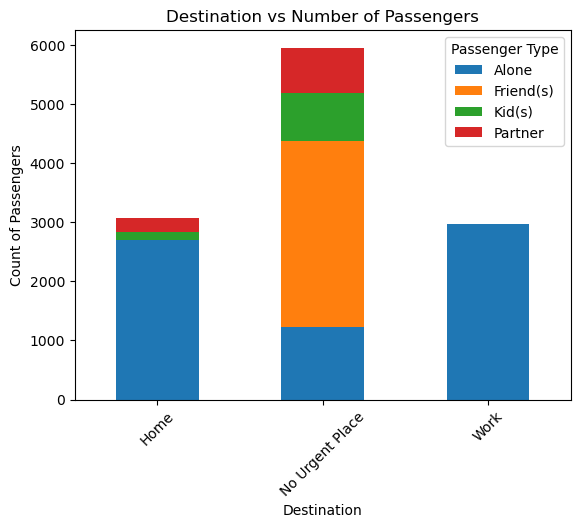

In [106]:
# Count the occurrences of each passenger type for each destination
destination_passenger_counts = df.groupby(['destination', 'passanger']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(10, 6))
destination_passenger_counts.plot(kind='bar', stacked=True)
plt.title('Destination vs Number of Passengers')
plt.xlabel('Destination')
plt.ylabel('Count of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Passenger Type', bbox_to_anchor=(1, 1))
plt.show()

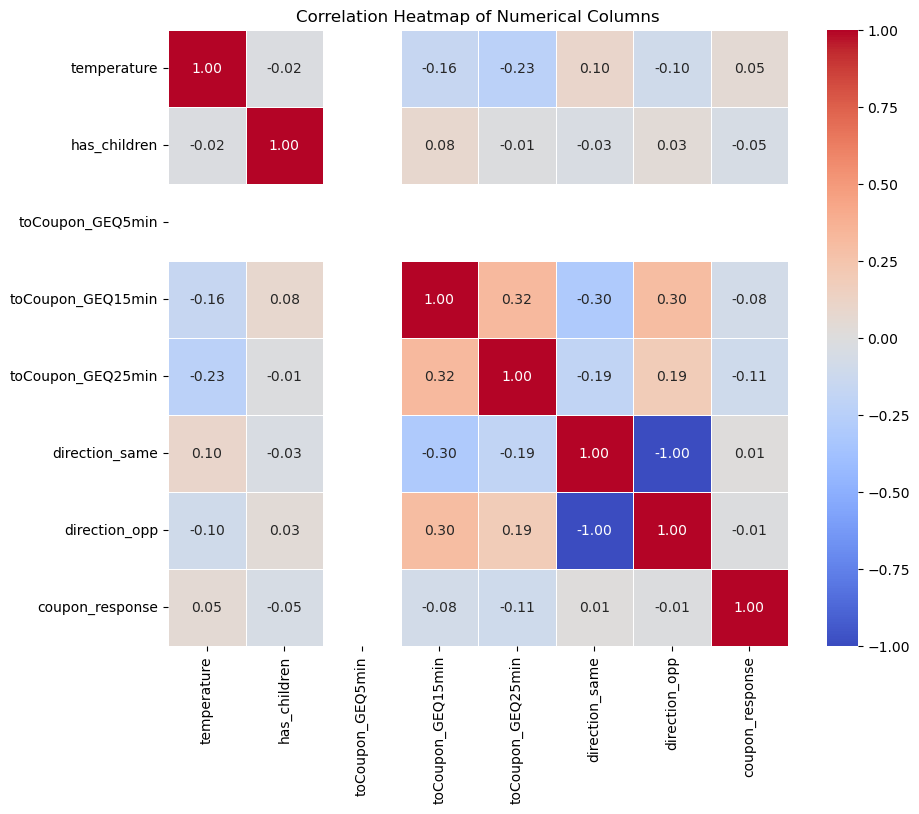

In [108]:
# Select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

#Data Cleaning

In [110]:
# Check data types
df.dtypes


destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
coupon_response          int64
dtype: object

#Data Standardization and Cleaning

In [112]:
for col in df.columns:
    print(f'column:{col}')
    print(df[col].unique())
    print('-' * 40)

column:destination
['No Urgent Place' 'Home' 'Work']
----------------------------------------
column:passanger
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
----------------------------------------
column:weather
['Sunny' 'Rainy' 'Snowy']
----------------------------------------
column:temperature
[55 80 30]
----------------------------------------
column:time
['2PM' '10AM' '6PM' '7AM' '10PM']
----------------------------------------
column:coupon
['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']
----------------------------------------
column:expiration
['1d' '2h']
----------------------------------------
column:gender
['Male' 'Female']
----------------------------------------
column:age
[21 46 26 31 41 '50plus' 36 'below21']
----------------------------------------
column:maritalStatus
['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
----------------------------------------
column:has_children
[0 1]
---------------------------------

From the inspection, here are the potential issues or areas for cleaning:

1) age: Contains inconsistent formats like integers (e.g., 21) and strings (e.g., '50plus', 'below21'). This column needs to be standardized.

2) income: The ranges are strings and could be mapped into numerical bins for better analysis.

3) Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50: These columns use categorical ranges like 'less1', '1~3', '4~8', and 'gt8'. These should be converted to ordinal or numerical values.

4) toCoupon_GEQ5min: Has only one unique value [1], so it can likely be dropped as it provides no variation.

5) time: The values like '2PM' and '10AM' could be converted into a numerical format for easier handling, such as hours on a 24-hour clock.

In [114]:
#Standardize the age column
df['age'] = df['age'].replace({'below21': 20, '50plus': 50}).astype(int)
df['age'].unique()

array([21, 46, 26, 31, 41, 50, 36, 20])

In [116]:
# Define a mapping for income ranges to numerical bins (midpoint of each range)
income_mapping = {
    'Less than $12500': 6250,
    '$12500 - $24999': 18750,
    '$25000 - $37499': 31250,
    '$37500 - $49999': 43750,
    '$50000 - $62499': 56250,
    '$62500 - $74999': 68750,
    '$75000 - $87499': 81250,
    '$87500 - $99999': 93750,
    '$100000 or More': 112500
}

# Map the income column
df['income'] = df['income'].map(income_mapping)

# Check the transformed values
df['income'].unique()


array([ 68750,  18750,  81250,  56250,  43750,  31250, 112500,  93750,
         6250], dtype=int64)

The income column is now standardized into numerical bins, making it easier to analyze or use for modeling.

Each income range has been mapped to its approximate midpoint for numerical consistency.

In [118]:
# Define the mapping for categorical ranges
range_mapping = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
}

# List of columns to standardize
columns_to_transform = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Apply the mapping to each column
for col in columns_to_transform:
    df[col] = df[col].map(range_mapping)

# Verify the transformation
print(df[columns_to_transform].head())


    Bar  CoffeeHouse  CarryAway  RestaurantLessThan20  Restaurant20To50
22  0.0          0.5        6.0                   6.0               0.5
23  0.0          0.5        6.0                   6.0               0.5
24  0.0          0.5        6.0                   6.0               0.5
25  0.0          0.5        6.0                   6.0               0.5
26  0.0          0.5        6.0                   6.0               0.5


In [120]:
# Drop the column with only one unique value
df = df.drop(columns=['toCoupon_GEQ5min'])

# Verify the column has been removed
print(df.columns)


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp',
       'coupon_response'],
      dtype='object')


#Time: The values like '2PM' and '10AM' could be converted into a numerical format for easier handling, such as hours on a 24-hour clock.

In [122]:
# Function to convert time to 24-hour format
def convert_to_24hr(time_str):
    # Check if the time contains AM or PM
    if 'AM' in time_str:
        hour = int(time_str.replace('AM', '').strip())
        if hour == 12:  # 12 AM should be 00:00 in 24-hour format
            return 0
        else:
            return hour
    elif 'PM' in time_str:
        hour = int(time_str.replace('PM', '').strip())
        if hour == 12:  # 12 PM is 12:00 in 24-hour format
            return 12
        else:
            return hour + 12  # Add 12 for PM times
    return None

# Apply the function to the 'time' column
df['time_24hr'] = df['time'].apply(convert_to_24hr)

# Show the updated DataFrame with the new 'time_24hr' column
print(df[['time', 'time_24hr']].head())


    time  time_24hr
22   2PM         14
23  10AM         10
24  10AM         10
25  10AM         10
26   2PM         14


In [124]:
df.drop(columns=['time'] ,inplace=True)

In [126]:
df.head(3)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_response,time_24hr
22,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Male,21,Single,0,...,0.5,6.0,6.0,0.5,0,0,0,1,1,14
23,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,...,0.5,6.0,6.0,0.5,0,0,0,1,0,10
24,No Urgent Place,Friend(s),Sunny,80,Bar,1d,Male,21,Single,0,...,0.5,6.0,6.0,0.5,0,0,0,1,1,10


#Outlier detection for numerical columns:

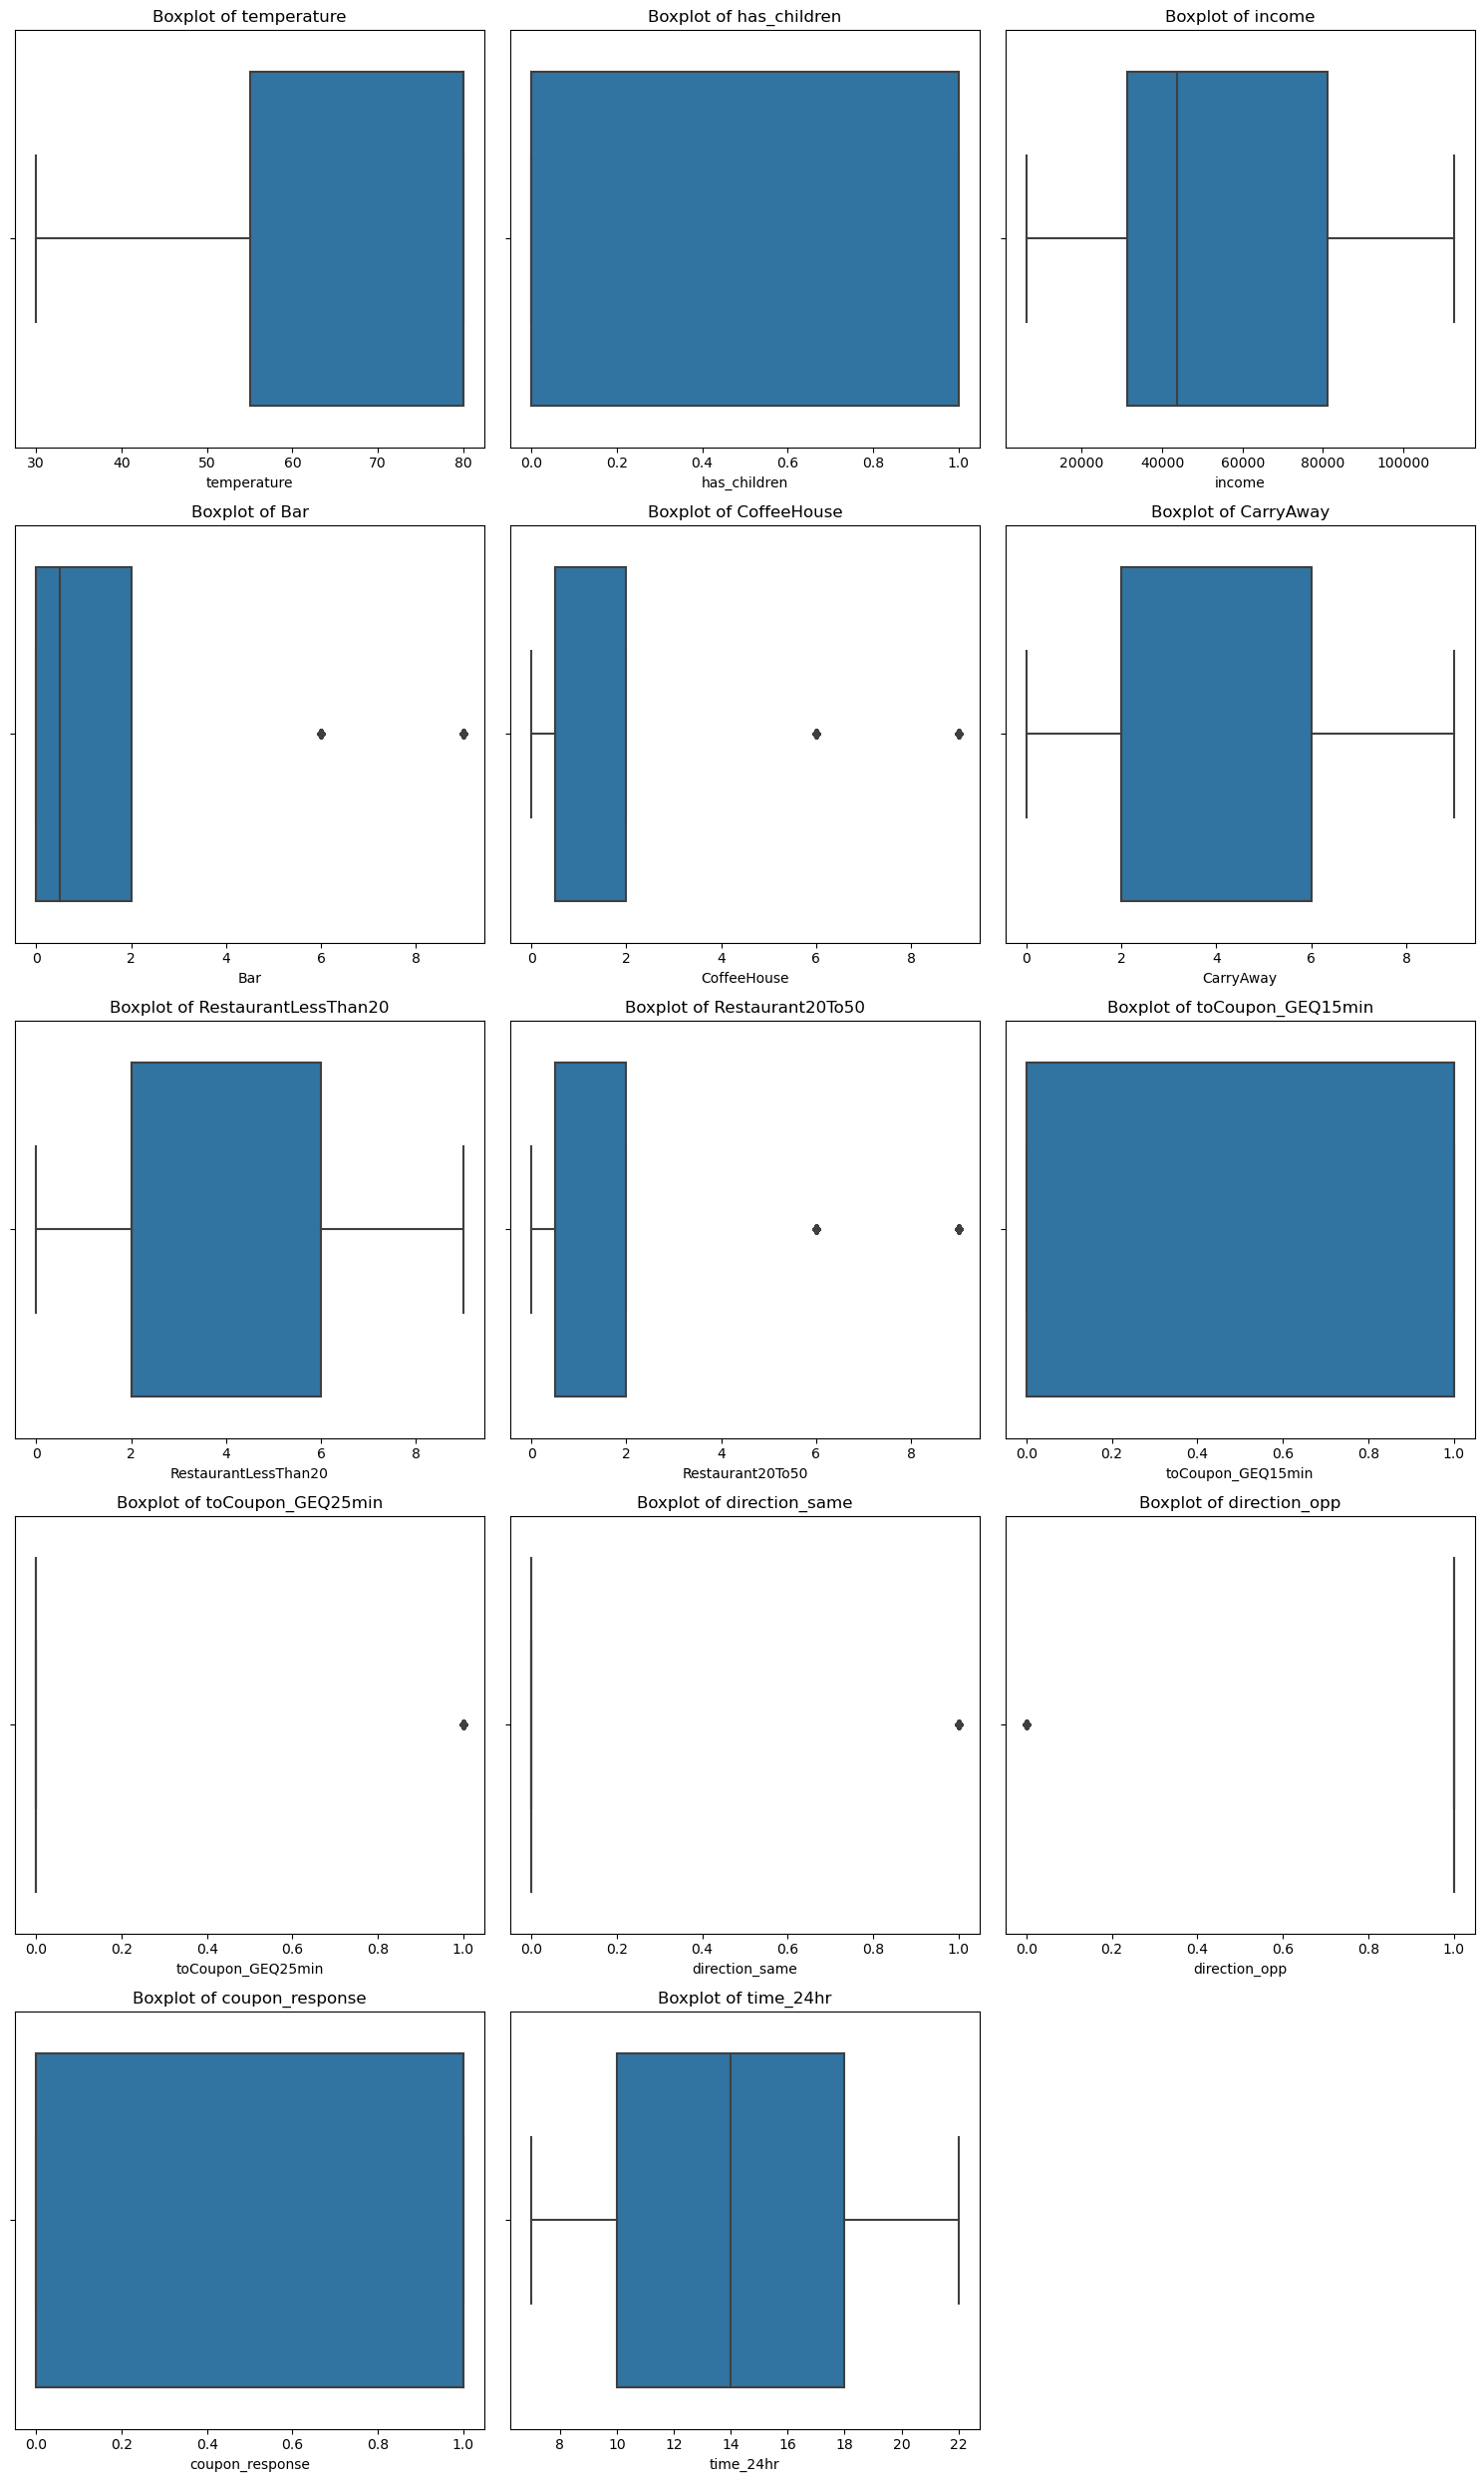

In [128]:
# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate number of rows and columns for subplots
num_columns = len(numerical_columns)
num_rows = math.ceil(num_columns / 3)  # 3 columns per row

# Plotting boxplots for each numerical column to check for outliers
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Z-score Method:
The Z-score measures how many standard deviations a data point is from the mean.
If the absolute value of the Z-score is greater than a threshold (usually 3), it is considered an outlier.

In [130]:


# Calculating Z-scores for numerical columns
numerical_columns = ['temperature', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 
                     'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']

# Calculate Z-scores
z_scores = df[numerical_columns].apply(zscore)

# Identify outliers (where Z-score > 3 or < -3)
outliers_zscore = (z_scores > 3) | (z_scores < -3)
outliers_zscore_count = outliers_zscore.sum()  # Count of outliers for each column

print("Outliers based on Z-scores:")
print(outliers_zscore_count)


Outliers based on Z-scores:
temperature               0
Bar                     326
CoffeeHouse               0
CarryAway                 0
RestaurantLessThan20      0
Restaurant20To50        264
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
dtype: int64


IQR Method:
IQR is the range between the 25th (Q1) and 75th (Q3) percentiles.

In [132]:
#calculating IQR for numerical columns

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)

IQR = Q3 - Q1

#IDENTIFYING OUTLIERS

outliers_iqr = ((df[numerical_columns] < (Q1 - 1.5*IQR )) | (df[numerical_columns] > (Q3 + 1.5*IQR )))

outliers_iqr_count = outliers_iqr.sum()  # Count of outliers for each column
print("Outliers based on IQR:")
print(outliers_iqr_count)

Outliers based on IQR:
temperature                0
Bar                     1375
CoffeeHouse             2762
CarryAway                  0
RestaurantLessThan20       0
Restaurant20To50         948
toCoupon_GEQ15min          0
toCoupon_GEQ25min       1396
direction_same          2593
direction_opp           2593
dtype: int64


In [134]:
# Capping the outliers
for column in numerical_columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    
    # Cap the values
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

print("Outliers have been capped.")


Outliers have been capped.


#Skewness tells you how asymmetric the distribution of data is.

A skewness of 0 indicates a perfectly symmetric distribution.
Positive skew (> 0) indicates that the right tail of the distribution is longer.
Negative skew (< 0) indicates that the left tail is longer.

In [136]:
# Calculate skewness for numerical columns
skewness = df[numerical_columns].skew()

# Display skewness values
print("Skewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
temperature            -0.642551
Bar                     1.593122
CoffeeHouse             0.644640
CarryAway               0.368904
RestaurantLessThan20    0.623931
Restaurant20To50        1.417755
toCoupon_GEQ15min      -0.239762
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
dtype: float64


In [138]:


# Applying log transformation to positively skewed features
positively_skewed = ['Bar', 'Restaurant20To50', 'CoffeeHouse']

# Apply log transformation
df[positively_skewed] = df[positively_skewed].apply(lambda x: np.log1p(x))

# Check the skewness after transformation
# Calculate skewness for numerical columns
skewness = df[numerical_columns].skew()

# Display skewness values
print("Skewness of numerical columns:")
print(skewness)



Skewness of numerical columns:
temperature            -0.642551
Bar                     0.903932
CoffeeHouse             0.163957
CarryAway               0.368904
RestaurantLessThan20    0.623931
Restaurant20To50        0.644540
toCoupon_GEQ15min      -0.239762
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
dtype: float64


In [140]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df.head(2)


,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_response,time_24hr
22,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0.0,0.405465,6.0,6.0,0.405465,0,0,0,1,1,14
23,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0.0,0.405465,6.0,6.0,0.405465,0,0,0,1,0,10


In [144]:
#checking boxplot after dealing the outliers

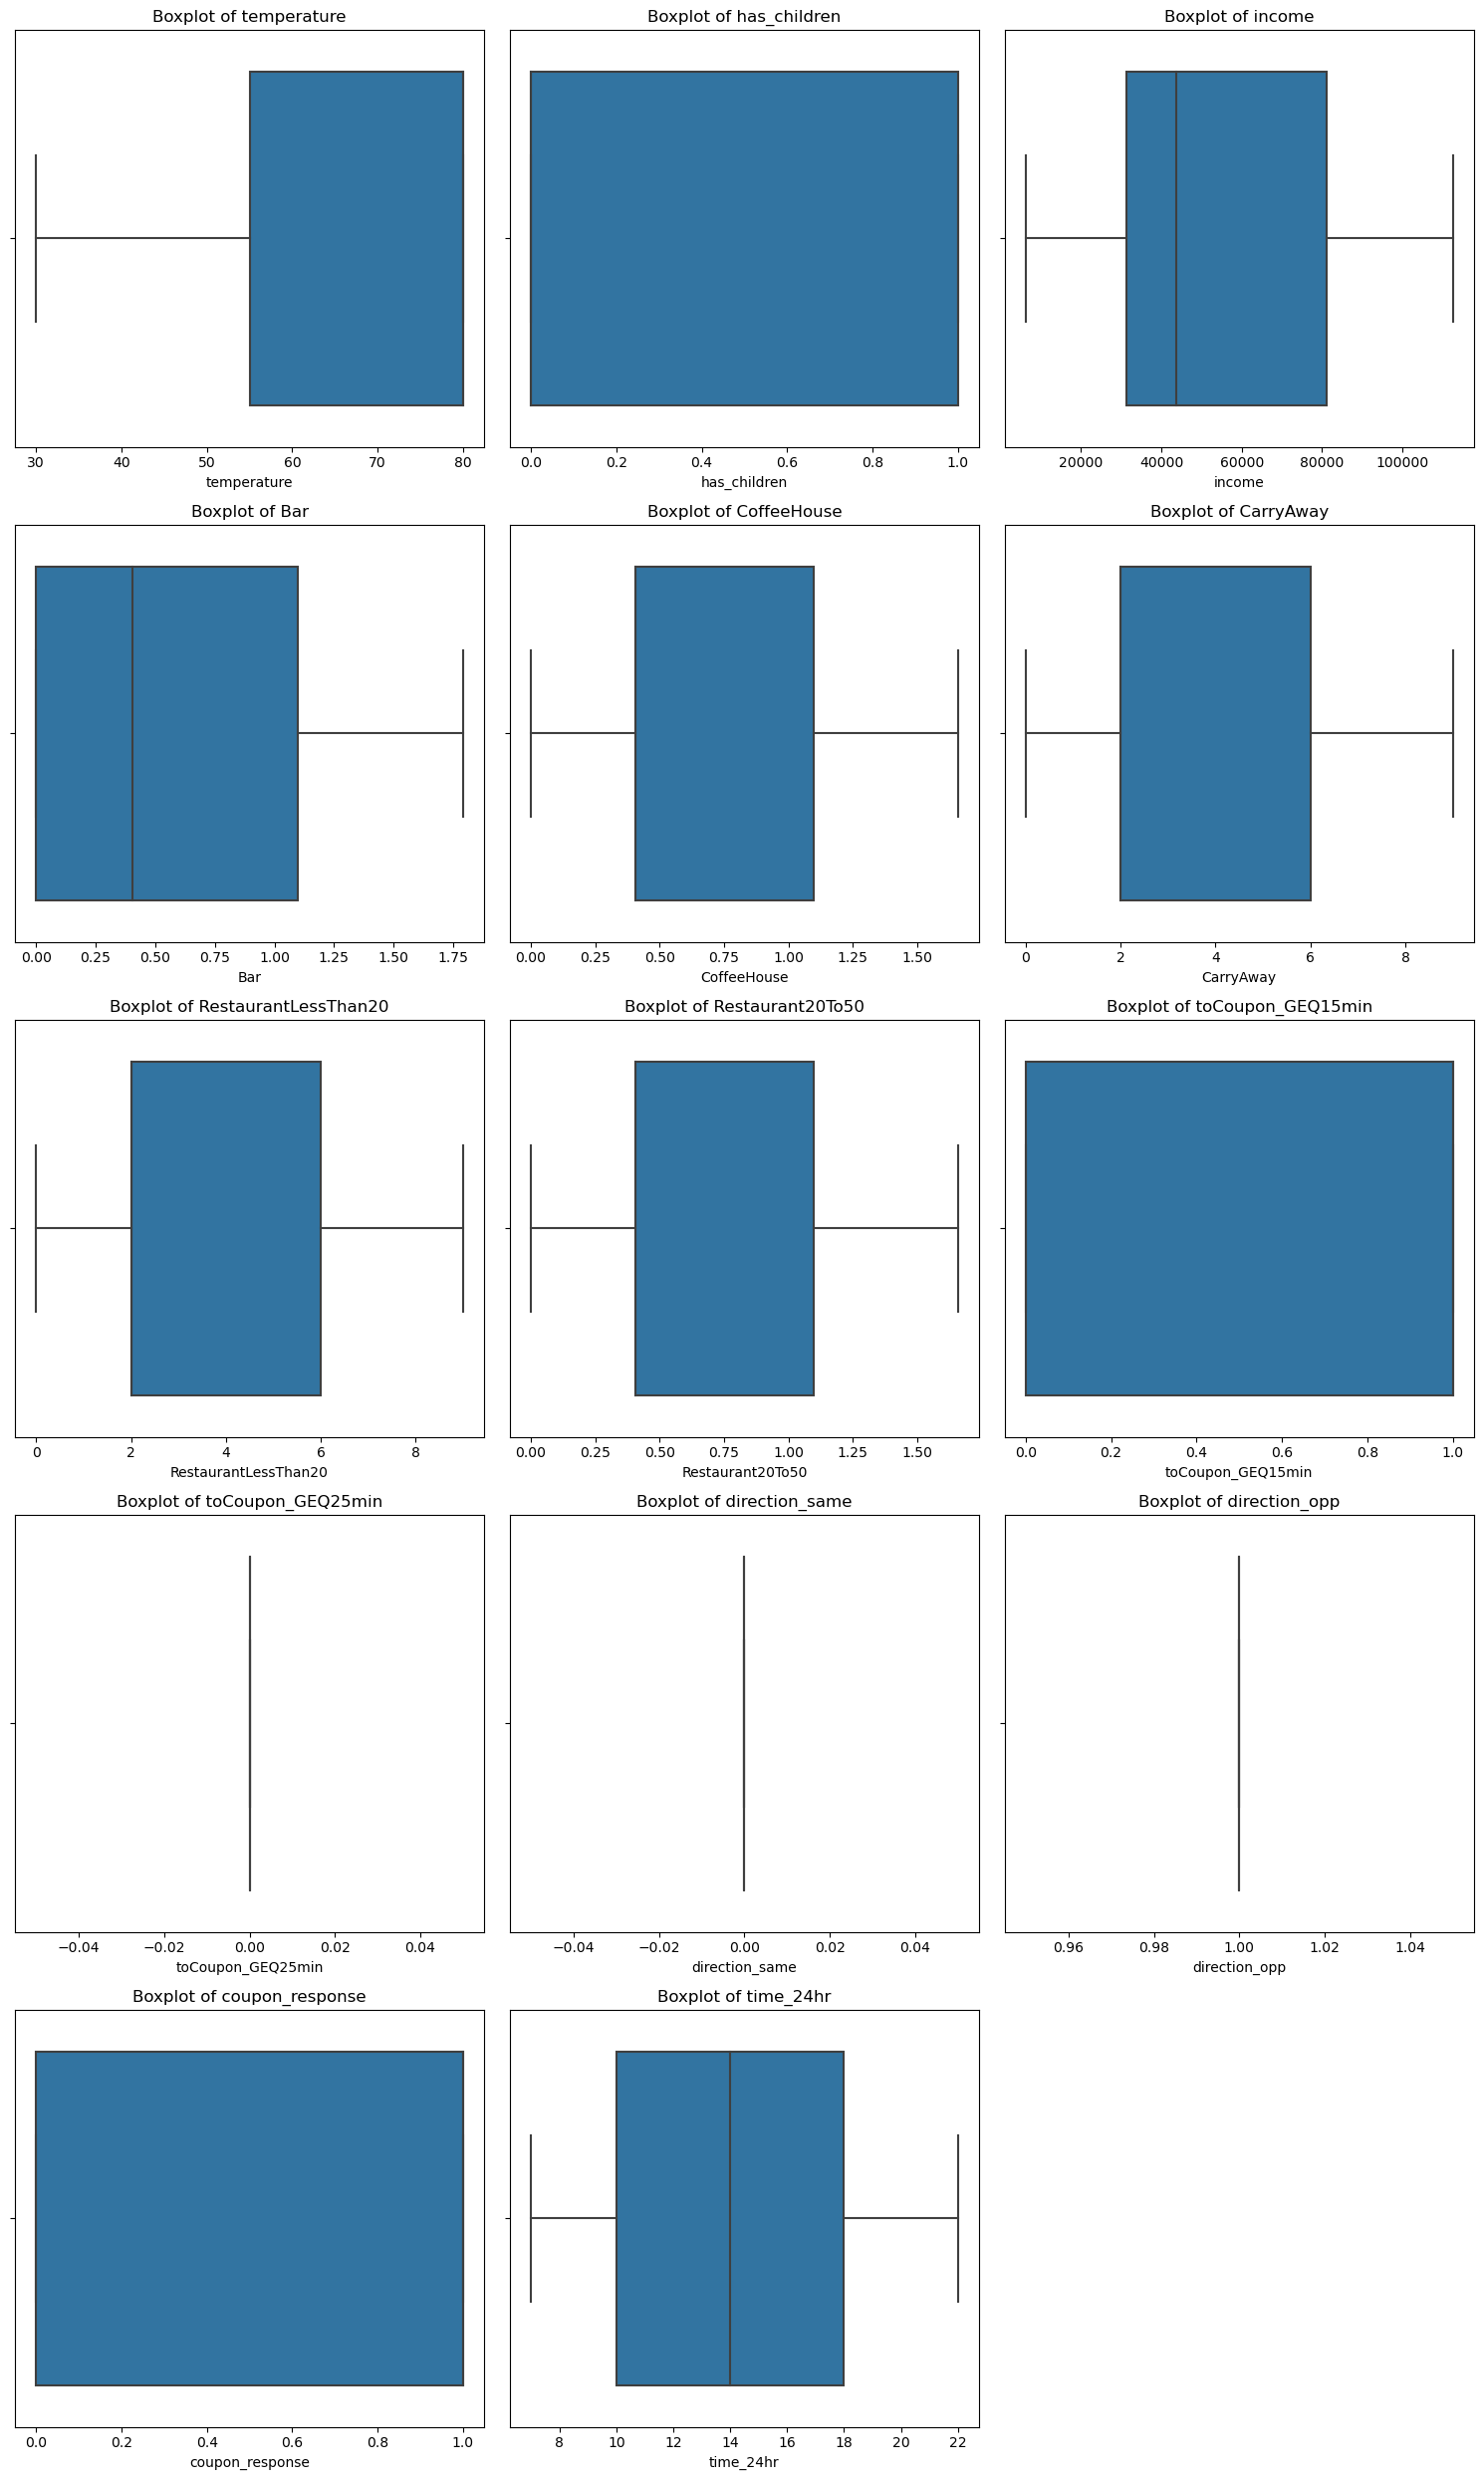

In [142]:
# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate number of rows and columns for subplots
num_columns = len(numerical_columns)
num_rows = math.ceil(num_columns / 3)  # 3 columns per row

# Plotting boxplots for each numerical column to check for outliers
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [150]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp',
       'coupon_response', 'time_24hr'],
      dtype='object')

In [94]:
#encoding

In [152]:
# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply OneHotEncoder for all categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataframe
df.head(2)


,temperature,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_response,time_24hr,destination_No Urgent Place,destination_Work,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Snowy,weather_Sunny,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_2h,gender_Male,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
22,55,21,0,68750,0.0,0.405465,6.0,6.0,0.405465,0,0,0,1,1,14,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23,80,21,0,68750,0.0,0.405465,6.0,6.0,0.405465,0,0,0,1,0,10,True,False,True,False,False,False,True,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [154]:
df.shape

(12007, 61)

In [97]:
#scaling

In [156]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['temperature', 'has_children', 'income', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'coupon_response', 'time_24hr'],
      dtype='object')

In [158]:


# Get the list of numerical columns excluding 'coupon_response'
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('coupon_response', errors='ignore')

# Initialize the scaler
scaler = StandardScaler()

# Scale only the numerical columns (excluding coupon_response)
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


#Feature Selection & Split Data into Training and Testing Sets

In [160]:


# Prepare data (features and target)
X = df.drop(columns='coupon_response')  # Drop the target column
y = df['coupon_response']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Apply SelectKBest with f_classif (which works with negative values)
kbest = SelectKBest(score_func=f_classif, k=10)  # Choose the top 10 features
X_train_kbest = kbest.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = X_train.columns[kbest.get_support()]
print("Selected Features:", selected_features)



Selected Features: Index(['CoffeeHouse', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Friend(s)', 'weather_Sunny', 'coupon_Carry out & Take away',
       'coupon_Coffee House', 'coupon_Restaurant(20-50)',
       'coupon_Restaurant(<20)', 'expiration_2h'],
      dtype='object')


In [162]:
print(y.unique())

[1 0]


In [164]:
print(data['coupon_response'].unique())
print(df['coupon_response'].unique())

[1 0]
[1 0]


In [166]:
#model building

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(probability=True),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [168]:
# Loop through all models
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(f"Model: {model_name}")
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("="*50)  # Separator between models

Model: Logistic Regression
Accuracy:  0.668609492089925
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.57      0.59      1028
           1       0.70      0.74      0.72      1374

    accuracy                           0.67      2402
   macro avg       0.66      0.66      0.66      2402
weighted avg       0.67      0.67      0.67      2402

Confusion Matrix:
 [[ 584  444]
 [ 352 1022]]
Model: SVC
Accuracy:  0.6702747710241466
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.45      0.54      1028
           1       0.67      0.84      0.74      1374

    accuracy                           0.67      2402
   macro avg       0.67      0.64      0.64      2402
weighted avg       0.67      0.67      0.66      2402

Confusion Matrix:
 [[ 461  567]
 [ 225 1149]]
Model: Decision Tree Classifier
Accuracy:  0.6840133222314738
Classification Report:
               precision

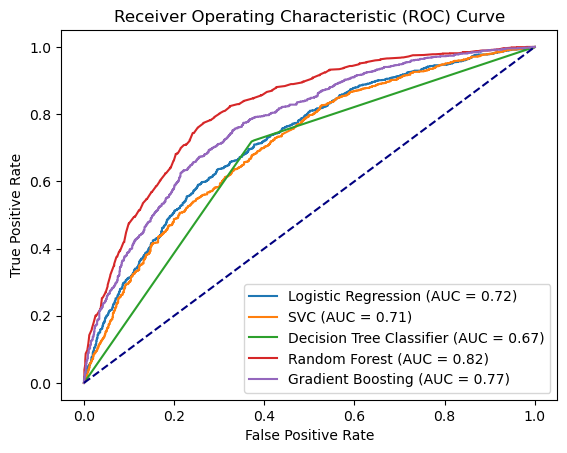

In [170]:

# Loop through all models
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions for the ROC curve
    if hasattr(model, 'predict_proba'):  # For models that have predict_proba (like Logistic Regression, Random Forest, etc.)
        y_prob = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
    else:  # For models like SVM, which use decision_function instead of predict_proba
        y_prob = model.decision_function(X_test)
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Customize the plot
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Random Forest stands out as the best model based on its highest accuracy (75.94%), better precision and recall for both classes, and an overall good balance between precision and recall (which leads to a higher F1-score).

Therefore, Random Forest is the most suitable model for classification task based on the evaluation metrics.

#Hyperparameter Tuning with GridSearchCV:

In [172]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred = best_rf_model.predict(X_test)
print("Tuned Random Forest Accuracy: ", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Accuracy:  0.7610324729392173


In [174]:
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

#Pipeline creation

In [176]:
pipeline = Pipeline([('selectkbest', SelectKBest(score_func=f_classif, k=10)),('scaler',StandardScaler()),('model',best_rf_model)])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('selectkbest', SelectKBest()), ('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(bootstrap=False, max_depth=30,
                                        max_features='auto',
                                        min_samples_split=5, n_estimators=200,
                                        random_state=42))])

In [178]:
y_pred_pipeline = pipeline.predict(X_test)
y_pred_pipeline

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

#Save the Model

In [180]:
import joblib
joblib.dump(pipeline,"pipeline_rfc.joblib")

['pipeline_rfc.joblib']

In [182]:
load_model = joblib.load('pipeline_rfc.joblib')

In [272]:
#Loading Unseen Data

In [184]:
# Load the dataset
unseen_data = pd.read_csv('unseen_vehicle_coupon.csv')

# Drop columns where all values are NaN
unseen_data = unseen_data.dropna(axis=1, how='all')

# Drop rows where all values are NaN
unseen_data = unseen_data.dropna(how='all')


print(unseen_data.shape)
unseen_data.head(1)


(10, 23)


,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,time_24hr
0,No Urgent Place,Alone,Sunny,55.0,Restaurant(<20),1d,Female,21.0,Single,1.0,Bachelors degree,Architecture & Engineering,6250.0,0.0,2.0,0.0,6.0,6.0,0.0,0.0,0.0,1.0,14.0


In [186]:
# List of positively skewed columns
positively_skewed = ['Bar', 'Restaurant20To50', 'CoffeeHouse']

# Apply the same log transformation to unseen data
unseen_data[positively_skewed] = unseen_data[positively_skewed].apply(lambda x: np.log1p(x))



In [188]:
# Apply OneHotEncoder (using pd.get_dummies) to the unseen data
unseen_data_encoded = pd.get_dummies(unseen_data, columns=categorical_columns, drop_first=True)

# Align the unseen data with the training data (fill missing columns with 0)
unseen_data_encoded = unseen_data_encoded.reindex(columns=df.columns, fill_value=0)



In [190]:
unseen_data_encoded.head(1)

,temperature,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_response,time_24hr,destination_No Urgent Place,destination_Work,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Snowy,weather_Sunny,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_2h,gender_Male,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
0,55.0,21.0,1.0,6250.0,0.0,1.098612,0.0,6.0,1.94591,0.0,0.0,0.0,1.0,0,14.0,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,0,0,0,0,False,0,False,False,0,0,False,0,0,0,False,0,0,0,0,False,False,False,0,False


#Test with Unseen Data

In [192]:
# Align unseen data columns with training data columns
unseen_data_encoded_aligned = unseen_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Use the pipeline to make predictions
y_unseen_pred = pipeline.predict(unseen_data_encoded_aligned)

# Add predictions back to the unseen data
unseen_data['Coupon_response_Predicted'] = y_unseen_pred

# Display the updated unseen data with predictions
print(unseen_data.head())


       destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny         55.0        Restaurant(<20)   
1             Work  Friend(s)   Rainy         80.0  Carry out & Take away   
2             Home     Kid(s)   Snowy         30.0      Restaurant(20-50)   
3  No Urgent Place    Partner   Sunny         55.0           Coffee House   
4             Work      Alone   Rainy         80.0                    Bar   

  expiration  gender   age      maritalStatus  has_children  \
0         1d  Female  21.0             Single           1.0   
1         2h    Male  50.0    Married partner           1.0   
2         1d    Male  46.0  Unmarried partner           0.0   
3         2h  Female  26.0           Divorced           1.0   
4         1d  Female  31.0            Widowed           0.0   

                                education                  occupation  \
0                        Bachelors degree  Architecture & Engineering   
1           

In [194]:
unseen_data


,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,time_24hr,Coupon_response_Predicted
0,No Urgent Place,Alone,Sunny,55.0,Restaurant(<20),1d,Female,21.0,Single,1.0,Bachelors degree,Architecture & Engineering,6250.0,0.000000,1.098612,0.0,6.0,1.945910,0.0,0.0,0.0,1.0,14.0,1
1,Work,Friend(s),Rainy,80.0,Carry out & Take away,2h,Male,50.0,Married partner,1.0,Some college - no degree,Student,18750.0,0.405465,1.945910,0.5,9.0,1.098612,1.0,1.0,1.0,0.0,10.0,0
2,Home,Kid(s),Snowy,30.0,Restaurant(20-50),1d,Male,46.0,Unmarried partner,0.0,Associates degree,Education&Training&Library,31250.0,1.098612,2.302585,2.0,2.0,0.405465,0.0,0.0,0.0,1.0,13.0,0
3,No Urgent Place,Partner,Sunny,55.0,Coffee House,2h,Female,26.0,Divorced,1.0,High School Graduate,Unemployed,43750.0,1.945910,1.098612,6.0,6.0,1.098612,1.0,1.0,0.0,1.0,8.0,1
4,Work,Alone,Rainy,80.0,Bar,1d,Female,31.0,Widowed,0.0,Graduate degree (Masters or Doctorate),Healthcare Support,56250.0,2.302585,1.945910,9.0,9.0,1.945910,1.0,0.0,1.0,1.0,9.0,0
5,Home,Friend(s),Snowy,30.0,Restaurant(<20),2h,Male,36.0,Married partner,1.0,Some High School,Sales & Related,68750.0,1.098612,0.000000,0.0,2.0,2.302585,1.0,0.0,0.0,0.0,11.0,1
6,No Urgent Place,Kid(s),Sunny,55.0,Carry out & Take away,2h,Male,46.0,Unmarried partner,1.0,Associates degree,Management,81250.0,1.945910,0.405465,0.5,6.0,0.000000,0.0,1.0,0.0,0.0,15.0,1
7,Work,Partner,Rainy,80.0,Restaurant(20-50),1d,Female,26.0,Divorced,1.0,High School Graduate,Computer & Mathematical,93750.0,2.302585,1.098612,2.0,2.0,0.405465,0.0,0.0,1.0,1.0,17.0,0
8,Home,Alone,Snowy,30.0,Coffee House,2h,Male,31.0,Widowed,0.0,Graduate degree (Masters or Doctorate),Farming Fishing & Forestry,112500.0,1.098612,1.945910,6.0,6.0,1.098612,1.0,1.0,0.0,0.0,16.0,0
9,Home,Partner,Sunny,80.0,Bar,1d,Male,36.0,Single,0.0,Some High School,Retired,6250.0,1.945910,2.302585,9.0,9.0,1.945910,0.0,0.0,0.0,1.0,9.0,1


Interpretation of Results

1. Model Performance:

The best-performing model after hyperparameter tuning was the Random Forest Classifier, achieving an accuracy of approximately 76% on the test dataset.

The model's predictions on unseen data were successfully generated after applying necessary preprocessing steps such as log transformations and encoding.

Performance Metrics:

The model demonstrated balanced precision, recall, and F1-scores across the target classes.

The confusion matrix indicates that while the model correctly identified both positive and negative responses.

2. Strengths of the Model:

Robustness: Random Forests effectively handle non-linear relationships and feature interactions, which suits the mixed categorical and numerical features of the dataset.

Feature Importance: The model highlights the most influential features driving the predictions, which can guide strategic decision-making.

Consistency: After hyperparameter tuning, the model outperformed other algorithms, including Logistic Regression, SVC, and Gradient Boosting, on both the test and unseen datasets.

3. Limitations of the Dataset:

Missing Data: Imputation of missing values introduced assumptions that might affect the results.

Weak Feature Contributions: Certain features, like "toCoupon_GEQ15min," may have limited relevance to the target variable, potentially introducing noise.

Limited Data Scale: The dataset size (12,684 instances) might restrict the model's generalizability. Expanding the dataset with more diverse samples could enhance robustness.

4. Future Improvements:

Additional Preprocessing: Experiment with other transformations or encoding techniques to refine the dataset further.

Feature Engineering: Generate new features  to uncover hidden patterns in the data.


5. Business Implications:

The model enables businesses to predict coupon acceptance based on contextual factors such as passenger type, weather, and time of day.

These insights allow for tailoring coupon offerings to increase acceptance rates, leading to better customer engagement and revenue growth.

By addressing the dataset's limitations and incorporating future enhancements, the model’s predictive capabilities can be further refined to provide actionable insights for real-world applications.



In [202]:
# Conclusion

After performing the necessary transformations, model evaluations, and hyperparameter tuning, the Random Forest Classifier emerged as the most effective model for this coupon recommendation task, demonstrating the highest accuracy and balanced performance across metrics. The integration of feature selection, scaling, and model optimization has successfully improved the model's prediction capabilities. The trained pipeline can now be used for future predictions on unseen data, offering a reliable solution for predicting coupon acceptance in various driving scenarios.
